<a href="https://colab.research.google.com/github/rimshasohai/ONLINE-EXAM-APPLICATION/blob/main/FYP(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#IMPORT THE ESSENTIALS

In [110]:
import tensorflow as tf
from PIL import Image,ImageFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices("GPU")
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from numpy.random import seed
seed(1337)
import datetime
import time
#from tensorflow import set_random_seed
#set_random_seed(42)
tensorflow.random.set_seed(42)
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
#from keras.optimizers import Adam
from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications.mobilenet_v3 import mobileNetV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import layers, models, Model, optimizers
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.python.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid
import seaborn as sns
#from plot_confusion_matrix import plot_confusion_matrix
print("All libraries are imported")
from google.colab import drive
drive.mount('/content/drive')

All libraries are imported
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
#DATA COLLECTION STEPS
#LOADING FILES AND EXPLORATORY DATA ANALYSIS

In [90]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train"
print(" Training directory found")
                                                                                                                                                                                                                                            
val_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid"
print(" Validation directory found")

test_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test"
print(" Test directory found")

category_names = sorted(os.listdir(train_data_dir))
print(category_names)

# print("test data samples",len(test_data_dir))
# nb_categories = len(category_names)
# print(nb_categories)

img_pr_val =[]
img_pr_test =[]
img_pr_cat=[]

for category in category_names:
    #folder = '/home/ubuntuos/Documents/Diabetic Retinopathy/Augmented data/train/' + '/' + category
    folderTrain="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train"+'/'+category
    #folderTrain = 'train' + '/'+ category
    img_pr_cat.append(len(os.listdir(folderTrain)))
    folderValidation="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid"+'/'+category
    #folderValidation = 'valid' + '/' + category
    img_pr_val.append(len(os.listdir(folderValidation)))
#     folderTest = test_data_dir + '/' + category
#     img_pr_test.append(len(os.listdir(folderTest)))

train_csv=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train.csv")
test_csv=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test.csv")

 Training directory found
 Validation directory found
 Test directory found
['Nrdr', 'Rdr']


In [91]:
print('TRAIN SIZE IS= {}'.format(len(train_csv)))
print('TEST SIZE IS= {}'.format(len(test_csv)))

TRAIN SIZE IS= 3662
TEST SIZE IS= 1928


In [92]:
train_csv.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [93]:
#DATA PREPROCESSING STEPS

In [95]:
#DATA PREPROCESSING STEPS INCLUDES
#1.LOADING IMAGES
#2.RESIZING OF IMAGES
#3.NORMALIZING IMAGES
#4.AUGMENTING IMAGES

In [97]:
img_height, img_width = 224,224
# the no. imgaes to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    #brightness_range=[0.8,1.0],
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,  # rotate images by up to 20 degrees
    #horizontal_flip=True,  # flip images horizontally
    #zoom_range=0.1,  # zoom images by up to 10%
    #shear_range=0.1,  # shear images by up to 10%
    #width_shift_range=0.1,  # shift images horizontally by up to 10%
    #height_shift_range=0.1  # shift images vertically by up to 10%
)

test_datagen =  ImageDataGenerator(
    rescale=1./255,
   #brightness_range=[0.8,1.0], 
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,  # rotate images by up to 20 degrees
    #horizontal_flip=True,  # flip images horizontally
    #zoom_range=0.1,  # zoom images by up to 10%
    #shear_range=0.1,  # shear images by up to 10%
    #width_shift_range=0.1,  # shift images horizontally by up to 10%
    #height_shift_range=0.1  # shift images vertically by up to 10%
)


val_datagen =  ImageDataGenerator(
    rescale=1./255,
   #brightness_range=[0.8,1.0], 
   featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,  # rotate images by up to 20 degrees
    #horizontal_flip=True,  # flip images horizontally
    #zoom_range=0.1,  # zoom images by up to 10%
    #shear_range=0.1,  # shear images by up to 10%
    #width_shift_range=0.1,  # shift images horizontally by up to 10%
    #height_shift_range=0.1  # shift images vertically by up to 10%
)

# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "binary",
    shuffle = True
    #,color_mode='grayscale'
)
total_train = train_generator.n

#train_generator = train_generator.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "binary"
    ,#color_mode='grayscale',
shuffle=True
)
total_val = val_generator.n
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "binary"
    ,#color_mode='grayscale',
shuffle=True)

Total number of images for "training":
Found 4200 images belonging to 2 classes.
Total number of images for "validation":
Found 1200 images belonging to 2 classes.
Total number of images for "testing":
Found 600 images belonging to 1 classes.


In [98]:
#APPLYING DATA PREPROCESSING ON IMAGES FROM TRAIN DATASET

RESIZING IMAGES TO ABOUT 224x224 PIXELS


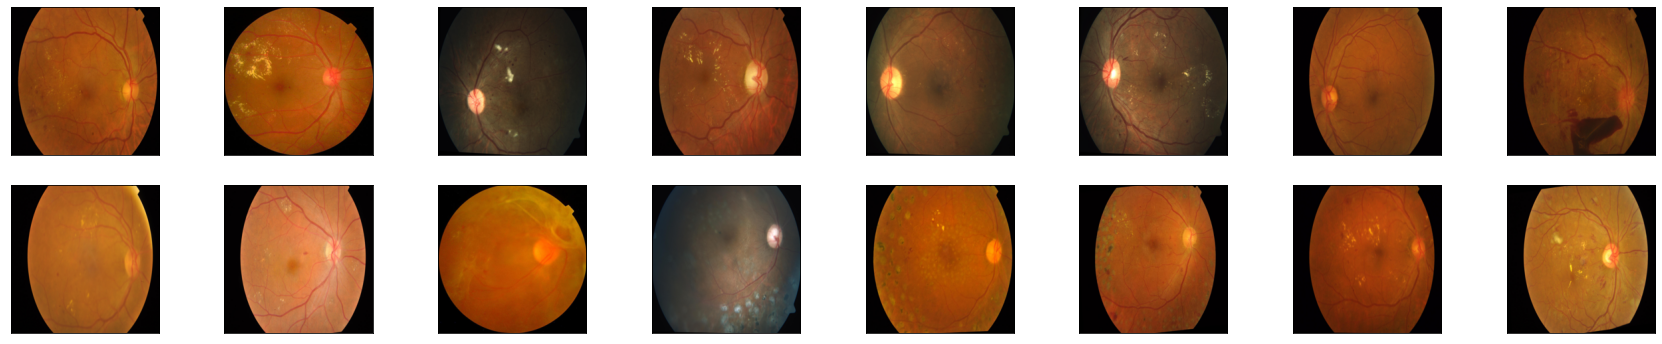

In [105]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
fig = plt.figure(figsize=(30, 6))
#print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 20 images
train_imgs= os.listdir(train_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     #RESIZING IMAGES
     resized_img = im.resize((224, 224))  # resize to (224, 224)
     resized_img_arr = np.array(resized_img)
     plt.imshow(resized_img)
print('RESIZING IMAGES TO ABOUT 224x224 PIXELS')

     





In [106]:
#GRAY SCALING

GRAY SCALED IMAGES


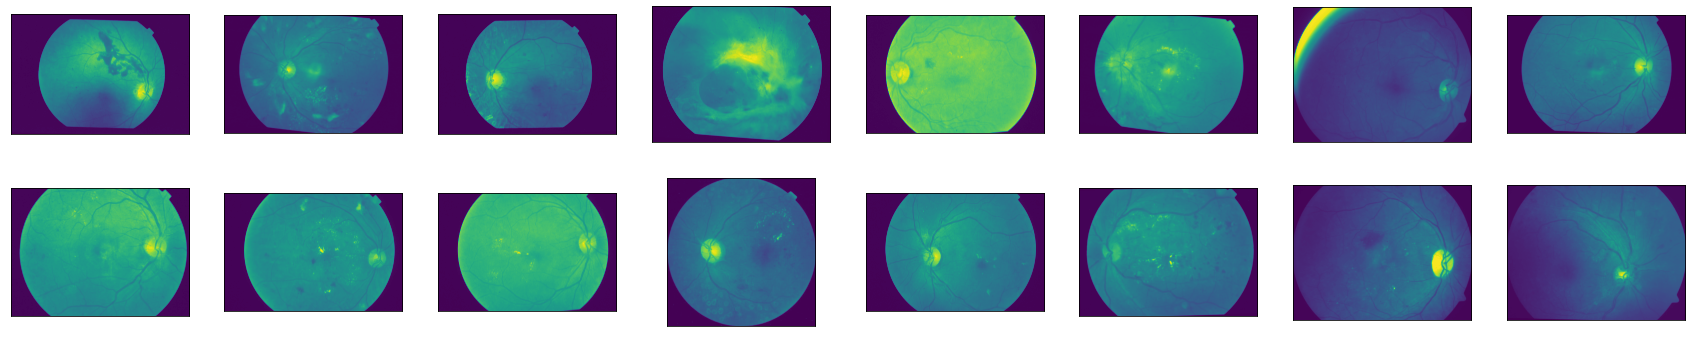

In [108]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
fig = plt.figure(figsize=(30, 6))
#print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 20 images
train_imgs= os.listdir(train_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     # Convert the image to grayscale
     gray_img = im.convert('L')

     # Display the grayscale image
     #gray_img.show()
     plt.imshow(gray_img)
print('GRAY SCALED IMAGES')


In [ ]:
#

In [116]:
#VISUALIZATION

In [8]:
#COUNTING THE NUMBER OF DIATEBETIC RETINOPATHY PATIENTS BELONGING TO EACH CLASSES

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


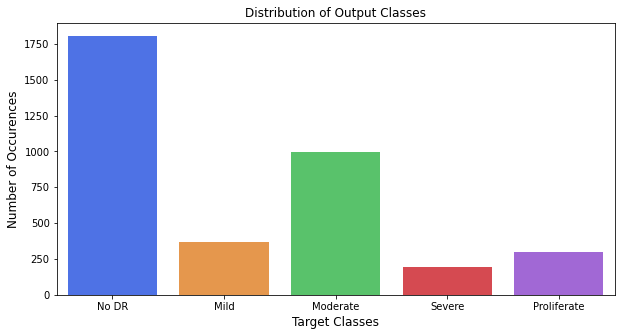

In [9]:
counts=train_csv['diagnosis'].value_counts()
class_list=['No DR','Mild','Moderate','Severe','Proliferate']
for i,x in enumerate(class_list):
    counts[x] = counts.pop(i)

plt.figure(figsize=(10,5))
sns.barplot(counts.index, counts.values,alpha=0.8,palette='bright')
plt.title('Distribution of Output Classes')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Target Classes',fontsize=12)
plt.show()


In [10]:
#VISUALIZING TRAINING DATA

In [11]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"

In [71]:
train_data_dir1 = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Nrdr"

CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY


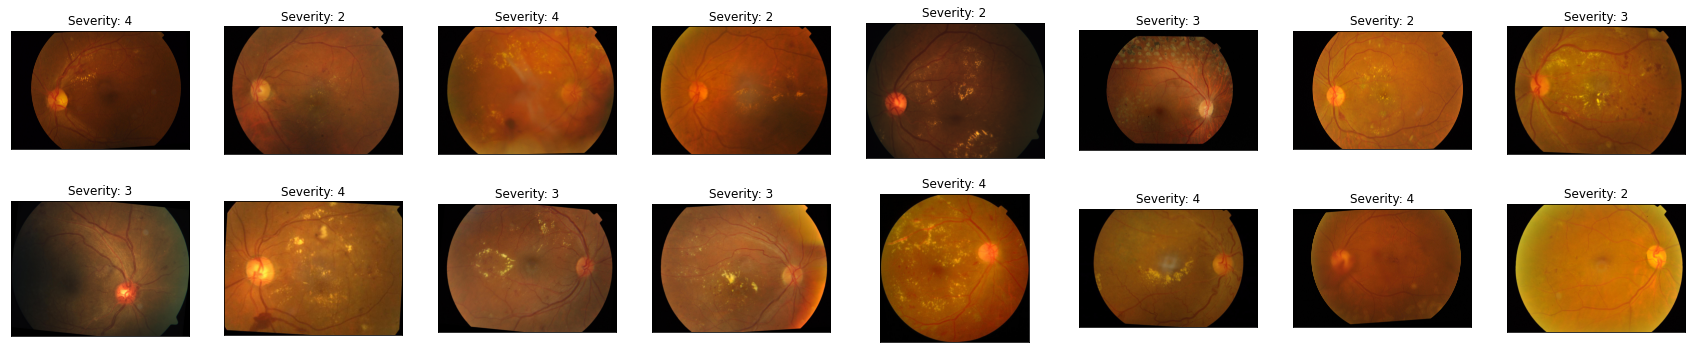

In [72]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(train_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)

     

            
           
               

In [70]:
#VISUALIZING TRAINING DATA ON NON PROLIFERATIVE DIABETIC RETINOPATHY

CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY


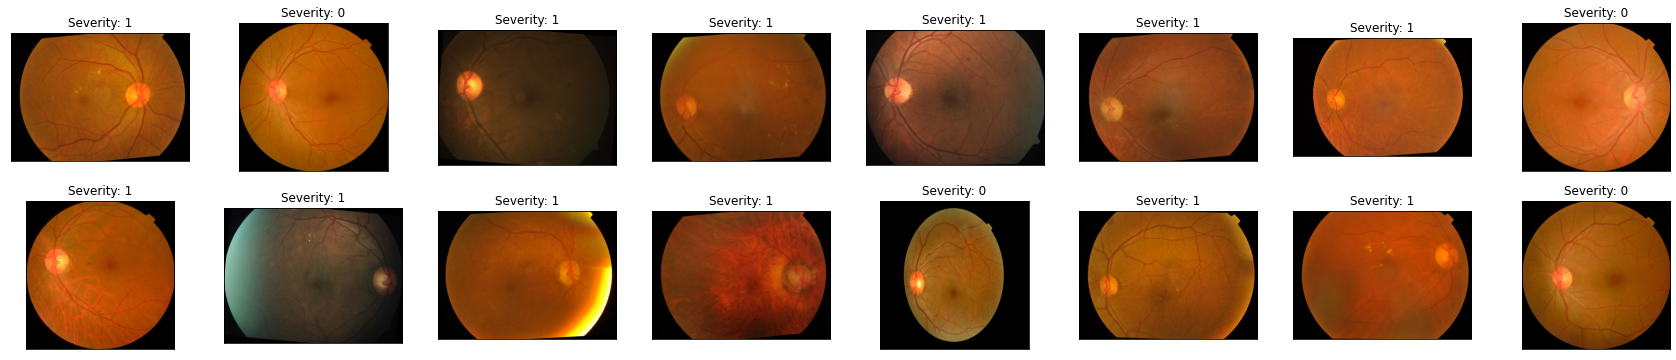

In [73]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(train_data_dir1)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Nrdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)


In [74]:
#VISUALIZING TESTING DATA ON NON PROLIFERATIVE DIABETIC RETINOPATHY

In [81]:
test_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test/test_merge"

CHECKING THE SEVERITY OF DIABETES ON TEST SET OF  DIABETIC RETINOPATHY


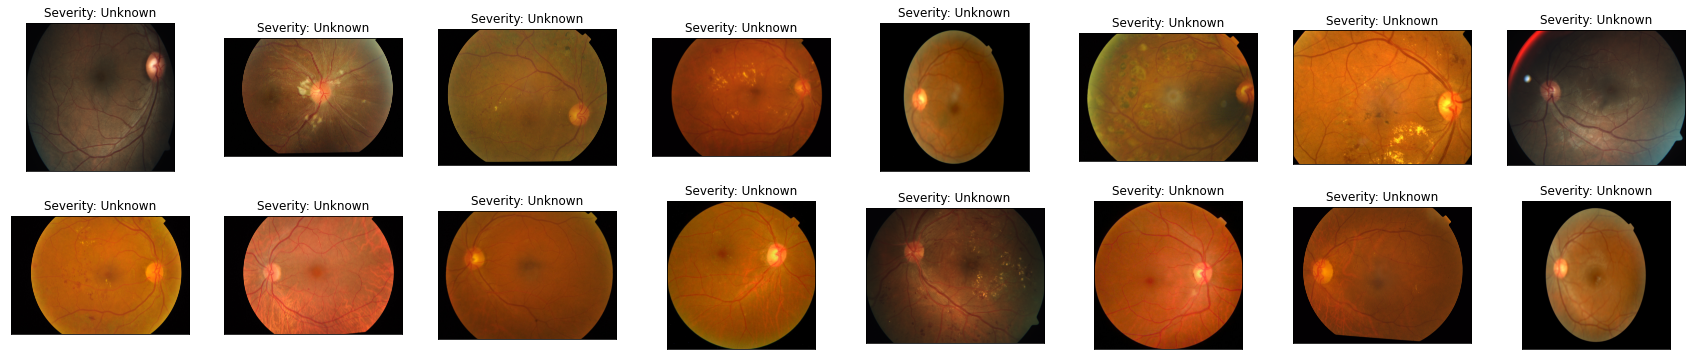

In [82]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON TEST SET OF  DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(test_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test/test_merge"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)


In [83]:
#VISUALIZING VALIDATION DATA ON NON PROLIFERATIVE DIABETIC RETINOPATHY

In [84]:
val_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Nrdr"
val_data_dir1 = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Rdr"

CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY


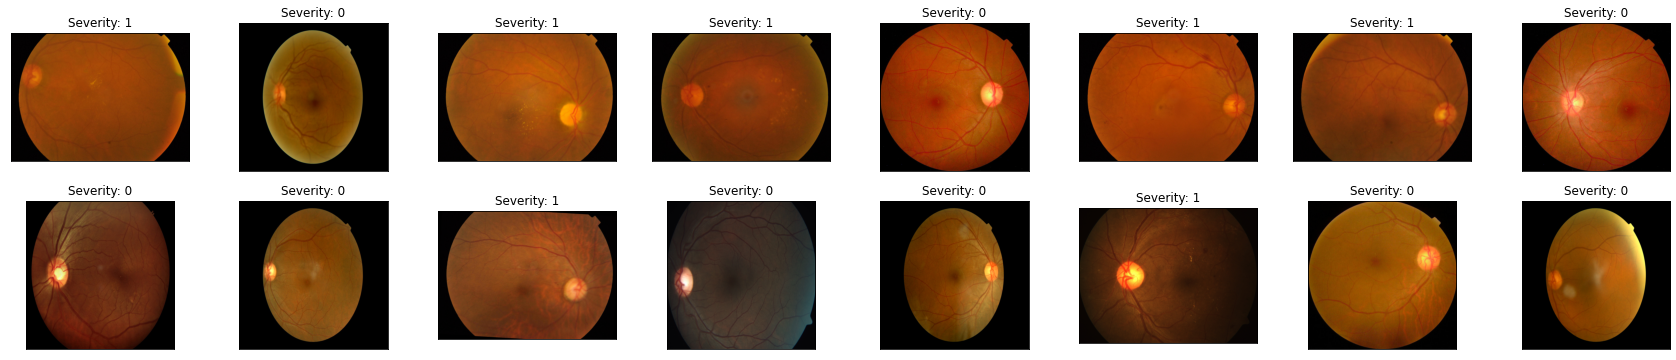

In [86]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON VALIDATION SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(val_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Nrdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)

CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY


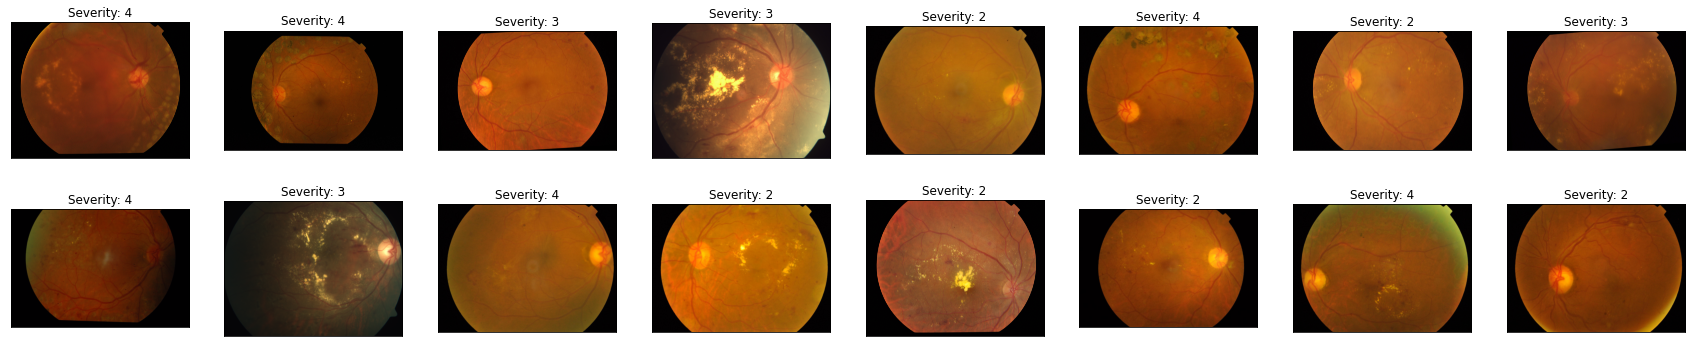

In [87]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON VALIDATION SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(val_data_dir1)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)